# Look at uncertainty in neural network model estimates
Created by Ivan Lima on Sun Feb 26 2023 13:02:13 -0500

In [1]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, datetime, warnings, cmocean
print('Last updated on {}'.format(datetime.datetime.now().ctime()))

Last updated on Mon Jul 24 20:36:35 2023


In [2]:
import sns_settings
sns.set_context('paper')
pd.options.display.max_columns = 50
warnings.filterwarnings('ignore')
dpi = 600

## Standard deviations from ensemble 

### DIC

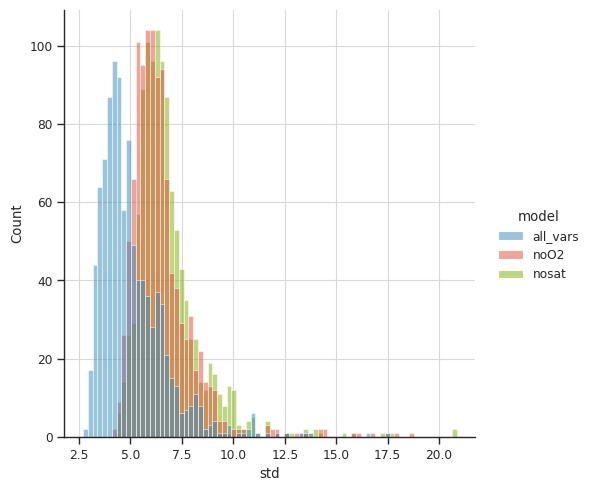

In [3]:
df_dic_all_vars = pd.read_csv('results/ensemble_preds_dic_all_vars.csv', index_col=0)
df_dic_noO2 = pd.read_csv('results/ensemble_preds_dic_noO2.csv', index_col=0)
df_dic_nosat = pd.read_csv('results/ensemble_preds_dic_nosat.csv', index_col=0)

df_dic_std_all_vars = df_dic_all_vars.drop('DIC_observed', axis=1).std(axis=1).rename('std').to_frame()
df_dic_std_all_vars['model'] = 'all_vars'
df_dic_std_noO2 = df_dic_noO2.drop('DIC_observed', axis=1).std(axis=1).rename('std').to_frame()
df_dic_std_noO2['model'] = 'noO2'
df_dic_std_nosat = df_dic_nosat.drop('DIC_observed', axis=1).std(axis=1).rename('std').to_frame()
df_dic_std_nosat['model'] = 'nosat'

df_dic_std = pd.concat([df_dic_std_all_vars, df_dic_std_noO2, df_dic_std_nosat], ignore_index=True)

g = sns.displot(x='std', data=df_dic_std, hue='model', kde=False)

### TA

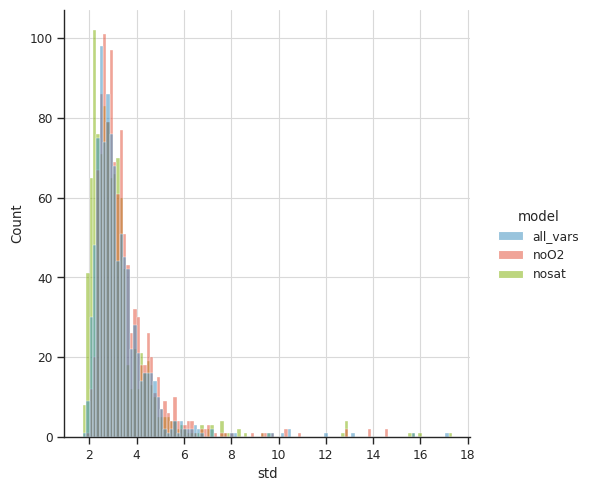

In [4]:
df_ta_all_vars = pd.read_csv('results/ensemble_preds_ta_all_vars.csv', index_col=0)
df_ta_noO2 = pd.read_csv('results/ensemble_preds_ta_noO2.csv', index_col=0)
df_ta_nosat = pd.read_csv('results/ensemble_preds_ta_nosat.csv', index_col=0)

df_ta_std_all_vars = df_ta_all_vars.drop('TA_observed', axis=1).std(axis=1).rename('std').to_frame()
df_ta_std_all_vars['model'] = 'all_vars'
df_ta_std_noO2 = df_ta_noO2.drop('TA_observed', axis=1).std(axis=1).rename('std').to_frame()
df_ta_std_noO2['model'] = 'noO2'
df_ta_std_nosat = df_ta_nosat.drop('TA_observed', axis=1).std(axis=1).rename('std').to_frame()
df_ta_std_nosat['model'] = 'nosat'

df_ta_std = pd.concat([df_ta_std_all_vars, df_ta_std_noO2, df_ta_std_nosat], ignore_index=True)

g = sns.displot(x='std', data=df_ta_std, hue='model', kde=False)

## Confidence intervals from standard deviations 

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

def compute_confidence_intervals(df, varname):
    df_out = df.drop(varname, axis=1).mean(axis=1).rename('ensemble_mean').to_frame()
    df_out['ensemble_std'] = df.drop(varname, axis=1).std(axis=1)
    df_out[varname] = df[varname]
    return df_out
    
df_dic_stats_all_vars = compute_confidence_intervals(df_dic_all_vars, 'DIC_observed')
df_dic_stats_all_vars['model'] = 'all_vars'
df_dic_stats_noO2 = compute_confidence_intervals(df_dic_noO2, 'DIC_observed')
df_dic_stats_noO2['model'] = 'noO2'
df_dic_stats_nosat = compute_confidence_intervals(df_dic_nosat, 'DIC_observed')
df_dic_stats_nosat['model'] = 'nosat'

df_dic_stats = pd.concat([df_dic_stats_all_vars, df_dic_stats_noO2, df_dic_stats_nosat], ignore_index=True)

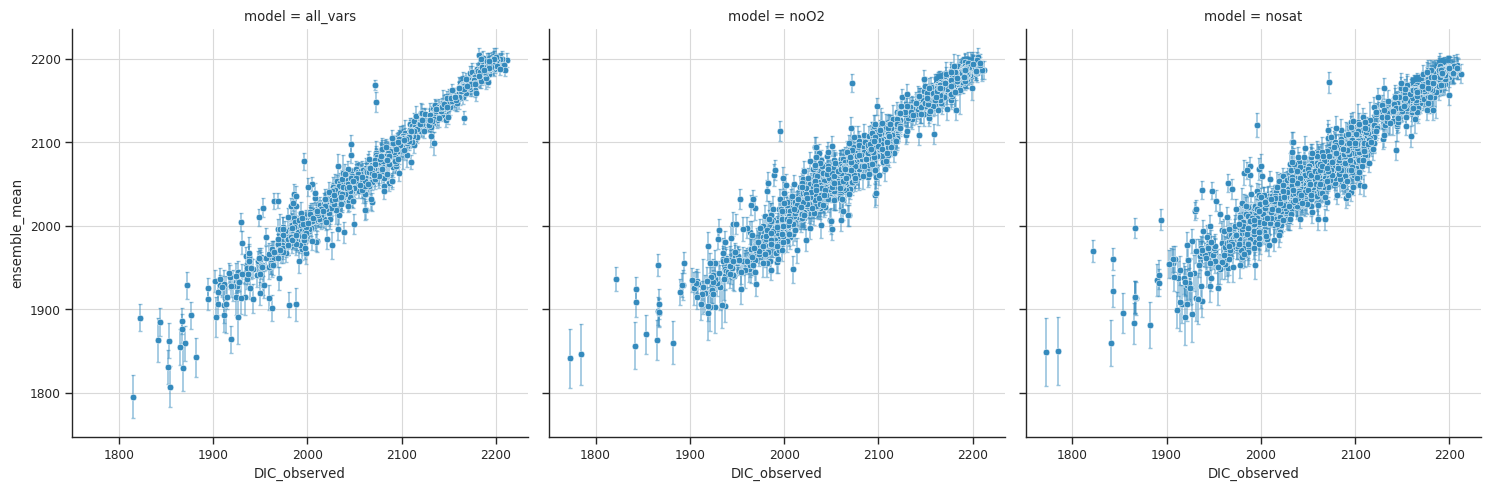

In [6]:
y_error_all_vars = df_dic_stats_all_vars['ensemble_std'] * 1.96 # 95% confidence intervals
y_error_noO2 = df_dic_stats_noO2['ensemble_std'] * 1.96
y_error_nosat = df_dic_stats_nosat['ensemble_std'] * 1.96

# color='C8'
color='C0'
g = sns.relplot(x='DIC_observed', y='ensemble_mean', data=df_dic_stats, col='model', zorder=2)

_ = g.axes[0,0].errorbar(df_dic_stats_all_vars.DIC_observed, df_dic_stats_all_vars.ensemble_mean,
                  yerr=y_error_all_vars, linestyle='', capsize=1.5, alpha=0.5, color=color, zorder=1)
_ = g.axes[0,1].errorbar(df_dic_stats_noO2.DIC_observed, df_dic_stats_noO2.ensemble_mean,
                  yerr=y_error_noO2, linestyle='', capsize=1.5, alpha=0.5, color=color, zorder=1)
_ = g.axes[0,2].errorbar(df_dic_stats_nosat.DIC_observed, df_dic_stats_nosat.ensemble_mean,
                  yerr=y_error_nosat, linestyle='', capsize=1.5, alpha=0.5, color=color, zorder=1)

## Distribution of RMSE values from ensemble

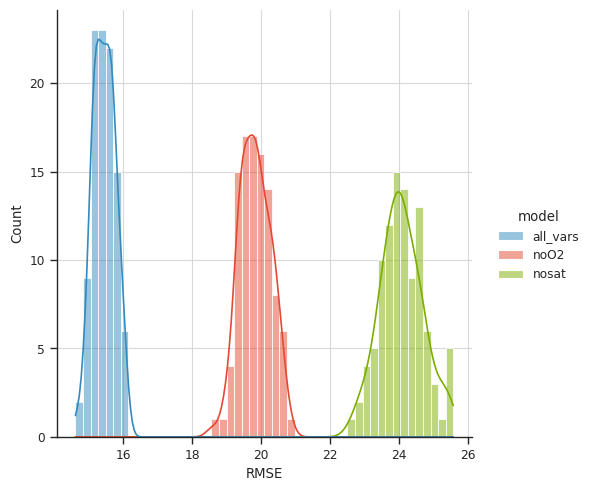

In [7]:
def compute_rmse(df, varname='DIC_observed'):
    df_preds = df.drop(varname, axis=1)
    rmse = [mean_squared_error(df['DIC_observed'], df_preds[col], squared=False) for col in df_preds.columns]
    return pd.DataFrame(rmse, columns=['RMSE'])

df_dic_rmse_all_vars = compute_rmse(df_dic_all_vars)
df_dic_rmse_all_vars['model'] = 'all_vars'
df_dic_rmse_noO2 = compute_rmse(df_dic_noO2)
df_dic_rmse_noO2['model'] = 'noO2'
df_dic_rmse_nosat = compute_rmse(df_dic_nosat)
df_dic_rmse_nosat['model'] = 'nosat'

df_dic_rmse = pd.concat([df_dic_rmse_all_vars, df_dic_rmse_noO2, df_dic_rmse_nosat], ignore_index=True)

g = sns.displot(x='RMSE', data=df_dic_rmse, hue='model', kde=True, bins=50)